In [403]:
#This notebook caluclated experineced rew rate for each stem, which resets at the beginning of each day.
#Then calculates how often he is at the experienced best stem. 
#finally calculates what the probability is at the stem right before he switches. 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial
0,0,4,B,1,805020202050,20201028,1,0
1,1,1,A,0,805020202050,20201028,1,1
2,2,2,A,0,805020202050,20201028,1,2
3,3,3,B,1,805020202050,20201028,1,3
4,4,4,B,0,805020202050,20201028,1,4
...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175
13289,13289,1,A,0,508020208020,20201107,6,176
13290,13290,2,A,0,508020208020,20201107,6,177
13291,13291,1,A,1,508020208020,20201107,6,178


In [328]:
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
df['session_chng'] =  df['session'].ne(df['session'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,at_best,best_stem2,at_best2,best_all,session_chng
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,1.000000,0.0,1.000000,0.0,NaN,0,B,1,01,True
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,0.000000,0.0,1.000000,0.0,NaN,0,B,0,00,False
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,0.000000,0.0,1.000000,0.0,NaN,0,B,0,00,False
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,1.000000,0.0,1.000000,0.0,NaN,0,B,1,01,False
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,0.666667,0.0,0.666667,0.0,NaN,0,B,1,01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,0.700000,0.7,0.200000,0.3,A,1,NaN,0,10,False
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,0.600000,0.6,0.200000,0.3,A,1,NaN,0,10,False
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,0.500000,0.5,0.200000,0.3,A,1,NaN,0,10,False
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,0.600000,0.6,0.200000,0.3,A,1,NaN,0,10,False


In [172]:
# #this calcs moving avg on daily basis
# for day_ix in range(1,max(df['day']+1)):
#     split_days = df[df['day'] == day_ix]
#     split_days
#     visits_A = split_days[(split_days['stem']=='A')]
#     visits_B = split_days[(split_days['stem']=='B')]
#     visits_C = split_days[(split_days['stem']=='C')]
#     ix = visits_A.index
#     ix1= visits_B.index
#     ix2 = visits_C.index
#     df.loc[ix,'rolling_avg_A'] = visits_A['reward'].ewm(span= 10).mean()
#     df.loc[ix1,'rolling_avg_B'] = visits_B['reward'].ewm(span= 10).mean()
#     df.loc[ix2,'rolling_avg_C'] = visits_C['reward'].ewm(span= 10).mean()


In [173]:
# cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
# df.loc[:,cols] = df.loc[:,cols].ffill()
# df.loc[:,cols] = df.loc[:,cols].fillna(.5)


In [174]:
# plt.plot(df.loc[715:725,'rolling_avg_A'])

In [175]:
#this should add new col to df. 
#col has rolling avg for each stem, resetting on each day. 
#would love to do exponentially weighted but have to learn about applying functions in groupby. 
obj = ['day', 'stem']
df['rew_rate'] = df.groupby(obj)[['reward']].transform(lambda x: x.rolling(10, 1).mean())

In [176]:
#This cell takes the one col of rew rate, and splits it into three rolling avgs for each stem
#they reset at the beginning of each day. 

df['rolling_avg_A'] =df[df['stem']=='A']['rew_rate']
df['rolling_avg_B'] =df[df['stem']=='B']['rew_rate']
df['rolling_avg_C'] =df[df['stem']=='C']['rew_rate']


cols = ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']
df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_A'] = 0
df.loc[(df['session'] ==1) & (df['trial']==0),'rolling_avg_C'] = 0

df.loc[:,cols] = df.loc[:,cols].ffill()




In [267]:
equal = (df['rolling_avg_A'] == df['rolling_avg_B']) | (df['rolling_avg_B'] == df['rolling_avg_C']) | (df['rolling_avg_A'] == df['rolling_avg_C'])
df['best_stem'] = df.loc[~equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)

In [282]:
#if df.loc[equal,['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']]:
    
df['best_stem2'] = df.loc[equal, ['rolling_avg_A', 'rolling_avg_B', 'rolling_avg_C']].idxmax(axis=1)
df
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem2'] = 'A'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem2'] = 'B'
replace_index = df.loc[(df['best_stem2'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem2'] = 'C'

In [283]:
#replace best stem of col name with b
replace_index = df.loc[(df['best_stem'] =='rolling_avg_A')].index
df.loc[replace_index,'best_stem'] = 'A'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_B')].index
df.loc[replace_index,'best_stem'] = 'B'
replace_index = df.loc[(df['best_stem'] =='rolling_avg_C')].index
df.loc[replace_index,'best_stem'] = 'C'


In [284]:
df['at_best'] = np.where( df['stem'] == df['best_stem'] , '1', '0')
df['at_best2'] = np.where( df['stem'] == df['best_stem2'] , '1', '0')

In [294]:
df['best_all'] = df['at_best'] +df['at_best2']
Not_at_Best = df[df['best_all']=='00']
at_best = df[df['best_all']=='01'] 
at_best2 = df[df['best_all']=='10']
print(len(Not_at_Best), len(at_best), len(at_best2))

5314 2908 5071


In [258]:
first = df.loc[(df['session'] ==1) & (df['day']==1) & df['cont_num']==1]

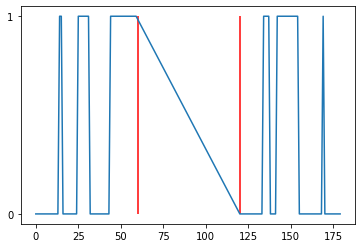

In [236]:
plt.plot(first['at_best'])
plt.vlines((60,120),0,1,colors='red')

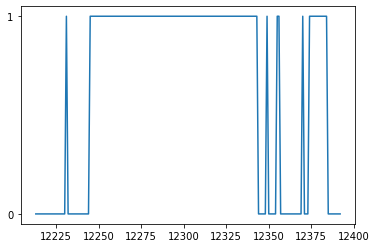

In [239]:
first_last = df.loc[(df['session'] ==1) & (df['day']==11) & df['cont_num']==1]
plt.plot(first_last['at_best'])
#plt.vlines((60,120),0,1,colors='red')

(array([8222.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5071.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

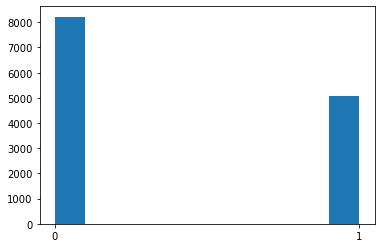

In [244]:
plt.hist(df['at_best'])

In [247]:
q1= df.loc[1:len(df)/4,'at_best']
q2= df.loc[len(df)/4:2*(len(df)/4),'at_best']
q3 = df.loc[2*len(df)/4:3*(len(df)/4),'at_best']
q4 = df.loc[len(df)/4:2*(len(df)/4),'at_best']

(array([2290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1033.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

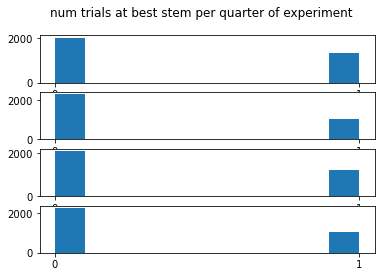

In [298]:

fig, axs = plt.subplots(4)
fig.suptitle('num trials at best stem per quarter of experiment' )
axs[0].hist(q1)
axs[1].hist(q2)# plt.hist(q2)
axs[2].hist(q3)
axs[3].hist(q4)
# plt.hist(q3)
# plt.hist(q4)

(array([2290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1033.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

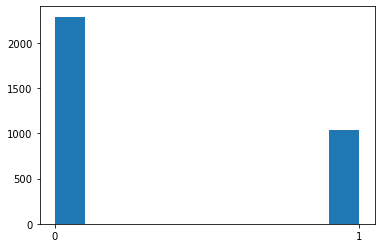

In [251]:
 plt.hist(q2)



(array([2109.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1214.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

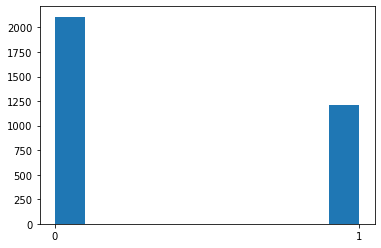

In [252]:
plt.hist(q3)



(array([2290.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1033.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

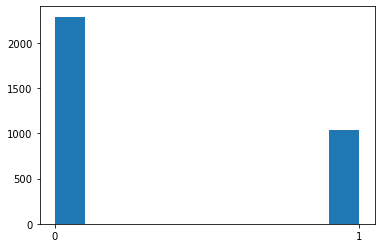

In [300]:
plt.hist(q4)



In [301]:
#Need to go back to observations. Would like to plot what AC plots- reward rate, visits 


,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,glob_nom_avg,rew_rate,rolling_avg_A,rolling_avg_B,rolling_avg_C,best_stem,at_best,best_stem2,at_best2,best_all
0,0,4,B,1,805020202050,20201028,1,0,1,1,...,40.0,1.000000,0.0,1.000000,0.0,NaN,0,B,1,01
1,1,1,A,0,805020202050,20201028,1,1,1,1,...,40.0,0.000000,0.0,1.000000,0.0,NaN,0,B,0,00
2,2,2,A,0,805020202050,20201028,1,2,1,1,...,40.0,0.000000,0.0,1.000000,0.0,NaN,0,B,0,00
3,3,3,B,1,805020202050,20201028,1,3,1,1,...,40.0,1.000000,0.0,1.000000,0.0,NaN,0,B,1,01
4,4,4,B,0,805020202050,20201028,1,4,1,1,...,40.0,0.666667,0.0,0.666667,0.0,NaN,0,B,1,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,...,45.0,0.700000,0.7,0.200000,0.3,A,1,NaN,0,10
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,...,45.0,0.600000,0.6,0.200000,0.3,A,1,NaN,0,10
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,...,45.0,0.500000,0.5,0.200000,0.3,A,1,NaN,0,10
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,...,45.0,0.600000,0.6,0.200000,0.3,A,1,NaN,0,10


#now would like to see what the exp rew rate is right before the rat leaves a stem. 

In [323]:
ix_stem_switch = df[df['stem_switch']==1].index
right_before_switch_ix = ix_stem_switch-1
list_of_avg_right_before_switch = []
for ix in range(1,len(right_before_switch_ix)):
    curr_stem = df.loc[right_before_switch_ix[ix],'stem']
    avg_at_stem = f'rolling_avg_{curr_stem}'
    curr_avg = df.loc[right_before_switch_ix[ix],avg_at_stem]
    list_of_avg_right_before_switch.append(curr_avg)
#print(curr_stem, curr_avg)


Text(0, 0.5, 'experienced probability')

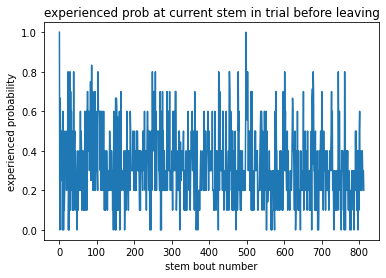

In [327]:
plt.plot(list_of_avg_right_before_switch)
plt.title('experienced prob at current stem in trial before leaving')
plt.xlabel('stem bout number')
plt.ylabel('experienced probability')

In [334]:
#now, how many trials after cont_change does rat switch stem 

cont_change_2_3_ix = df[(df['session_chng']!=1) & (df['new_cont']==1)].index
cont_change_2_3_ix

Int64Index([   60,   120,   240,   300,   420,   480,   600,   660,   780,
              840,
            ...
            12453, 12513, 12633, 12693, 12813, 12873, 12993, 13053, 13173,
            13233],
           dtype='int64', length=148)

In [411]:
lst_of_num_trials_at_stem_post_cont_change = []
for ix in range(len(cont_change_2_3_ix)):
    df1 = df[cont_change_2_3_ix[ix]:]
    trial_of_first_stem_switch = df1.loc[df1.stem_switch.ne(0).idxmax()]['trial']
    trial_of_first_stem_switch
    if (trial_of_first_stem_switch <120):
        trial_of_first_stem_switch = trial_of_first_stem_switch-60
    elif (trial_of_first_stem_switch >120):
        trial_of_first_stem_switch = trial_of_first_stem_switch-120
#trial_of_first_stem_switch
    lst_of_num_trials_at_stem_post_cont_change.append(trial_of_first_stem_switch) 
lst_of_num_trials_at_stem_post_cont_change1=lst_of_num_trials_at_stem_post_cont_change[0::2]
lst_of_num_trials_at_stem_post_cont_change2=lst_of_num_trials_at_stem_post_cont_change[1::2]


148 74 74


In [381]:
# ix = 79
# df1 = df[cont_change_2_3_ix[ix]:]
# df1
# trial_of_first_stem_switch = df1.loc[df1.stem_switch.ne(0).idxmax()]['trial']
# trial_of_first_stem_switch
# if (trial_of_first_stem_switch <120):
#         trial_of_first_stem_switch = trial_of_first_stem_switch-60
# elif (trial_of_first_stem_switch >120):
#         trial_of_first_stem_switch = trial_of_first_stem_switch-120
# trial_of_first_stem_switch


-60

In [380]:
#lst_of_num_trials_at_stem_post_cont_change[79]

-60

(0.0, 60.0)

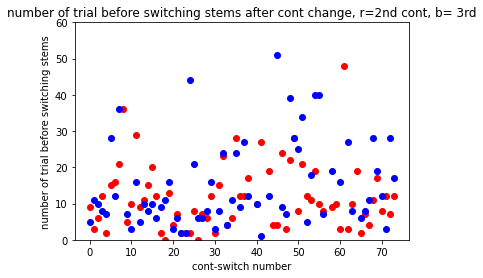

In [414]:
plt.scatter(range(len(lst_of_num_trials_at_stem_post_cont_change1)),lst_of_num_trials_at_stem_post_cont_change1, c='r')
plt.scatter(range(len(lst_of_num_trials_at_stem_post_cont_change2)),lst_of_num_trials_at_stem_post_cont_change2, c='b')
plt.title('number of trial before switching stems after cont change, r=2nd cont, b= 3rd')
plt.xlabel('cont-switch number')
plt.ylabel('number of trial before switching stems')
plt.ylim(0,60)

In [391]:
lst_of_num_trials_at_stem_post_cont_change[lst_of_num_trials_at_stem_post_cont_change==120]

9

In [401]:
lst_of_num_trials_at_stem_post_cont_change

[9,
 5,
 3,
 11,
 6,
 10,
 12,
 8,
 2,
 7,
 15,
 28,
 16,
 12,
 21,
 36,
 36,
 74,
 5,
 7,
 10,
 3,
 29,
 16,
 9,
 5,
 11,
 10,
 15,
 8,
 20,
 10,
 12,
 6,
 2,
 9,
 0,
 11,
 13,
 16,
 4,
 3,
 7,
 6,
 2,
 2,
 2,
 2,
 2,
 44,
 8,
 21,
 0,
 6,
 7,
 6,
 6,
 8,
 12,
 16,
 2,
 3,
 15,
 8,
 23,
 24,
 4,
 4,
 6,
 11,
 28,
 24,
 12,
 9,
 12,
 27,
 17,
 12,
 -60,
 -60,
 10,
 10,
 27,
 1,
 -60,
 -60,
 19,
 12,
 4,
 -60,
 4,
 51,
 24,
 9,
 3,
 7,
 22,
 39,
 28,
 28,
 8,
 25,
 21,
 34,
 12,
 5,
 11,
 18,
 19,
 40,
 10,
 40,
 8,
 7,
 -60,
 -60,
 9,
 19,
 10,
 -60,
 3,
 16,
 48,
 120,
 3,
 27,
 10,
 8,
 19,
 -57,
 2,
 6,
 7,
 8,
 4,
 11,
 11,
 28,
 17,
 19,
 8,
 12,
 12,
 3,
 7,
 28,
 12,
 17]